In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("medical_insurance.csv")
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,23.0,23.0,23.0,72.680000,328.000000,54.502609,55.280870
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,18.0,18.0,18.0,135.850000,614.000000,100.958889,102.348889
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,59.0,58.0,59.0,101.365085,333.288136,79.469661,80.859831
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99222,"Initial hospital inpatient care, typically 50 ...",N,132.0,130.0,132.0,139.010455,356.492424,107.933409,107.969621
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99223,"Initial hospital inpatient care, typically 70 ...",N,220.0,215.0,220.0,205.185955,631.186364,157.908955,160.930409


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497892 entries, 0 to 9497891
Data columns (total 26 columns):
National Provider Identifier                                int64
Last Name/Organization Name of the Provider                 object
First Name of the Provider                                  object
Middle Initial of the Provider                              object
Credentials of the Provider                                 object
Gender of the Provider                                      object
Entity Type of the Provider                                 object
Street Address 1 of the Provider                            object
Street Address 2 of the Provider                            object
City of the Provider                                        object
Zip Code of the Provider                                    object
State Code of the Provider                                  object
Country Code of the Provider                                object
Provider Type    

In [4]:
data.shape

(9497892, 26)

In [5]:
data.isnull().sum()

National Provider Identifier                                      0
Last Name/Organization Name of the Provider                     145
First Name of the Provider                                   423916
Middle Initial of the Provider                              2630743
Credentials of the Provider                                  637367
Gender of the Provider                                       423842
Entity Type of the Provider                                       1
Street Address 1 of the Provider                                  1
Street Address 2 of the Provider                            5292992
City of the Provider                                              4
Zip Code of the Provider                                          1
State Code of the Provider                                        1
Country Code of the Provider                                      1
Provider Type                                                     1
Medicare Participation Indicator                

There are many NaNs in several columns, I will process them later. Let's only focus samples from Californa. 

In [6]:
# subset dataset to only Californa data
data_ca = data.loc[data['State Code of the Provider']=='CA']
data_ca.head()

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
101,1598783177,KARLIN,ANDREW,S,MD,M,I,25775 MCBEAN PKWY,NaN,VALENCIA,...,94010,Measurement and graphic recording of total and...,N,17.0,17.0,17.0,41.528824,75.000000,30.965294,29.162353
105,1750383659,CARSON,STANLEY,NaN,MD,M,I,4300 LONG BEACH BLVD,STE 300,LONG BEACH,...,92134,Diagnostic imaging of retina,N,1275.0,309.0,1275.0,50.786706,65.823529,38.850933,35.190141
125,1386796209,TINOOSH,FARNOOSH,NaN,M.D.,M,I,1503 S COAST DR,NaN,COSTA MESA,...,92020,Examination of cornea and iris using lens devi...,N,16.0,16.0,16.0,29.535000,75.000000,23.157500,21.092500
144,1518011006,MKHSYAN,HAKOP,NaN,M.D.,M,I,4645 HOLLYWOOD BLVD STE 6,NaN,LOS ANGELES,...,76700,Ultrasound of abdomen,N,15.0,15.0,15.0,137.127333,180.000000,103.911333,94.164000
146,1417273830,LE,TAMMY,H,MD,F,I,1211 W LA PALMA AVE,SUITE 207,ANAHEIM,...,99233,"Subsequent hospital inpatient care, typically ...",N,265.0,115.0,265.0,113.636717,181.154151,89.094226,82.820000


In [7]:
data_ca.shape

(731564, 26)

We can see that number of samples are reduced from 9+ millions to 700 thousands. Let's start to dive more into the dataset

In [8]:
import numpy as np

In [9]:
data_ca.isnull().sum()

National Provider Identifier                                     0
Last Name/Organization Name of the Provider                     27
First Name of the Provider                                   40497
Middle Initial of the Provider                              250116
Credentials of the Provider                                  54201
Gender of the Provider                                       40464
Entity Type of the Provider                                      0
Street Address 1 of the Provider                                 0
Street Address 2 of the Provider                            348746
City of the Provider                                             0
Zip Code of the Provider                                         0
State Code of the Provider                                       0
Country Code of the Provider                                     0
Provider Type                                                    0
Medicare Participation Indicator                              

In [10]:
data_ca_drop = data_ca.drop(['Middle Initial of the Provider', 'First Name of the Provider','Credentials of the Provider','Street Address 2 of the Provider','State Code of the Provider','Country Code of the Provider'], axis=1)

In [11]:
data_ca.groupby(['City of the Provider','HCPCS Description'])['Number of Services','Average Medicare Allowed Amount','Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount'].agg([np.max,np.min,np.mean, np.median, np.std])

Number of Services  \
                                                                                      amax   
City of the Provider HCPCS Description                                                       
29 PALMS             Administration of influenza virus vaccine                        48.0   
                     Administration of pneumococcal vaccine                           24.0   
                     Annual wellness visit, includes a personalized ...               43.0   
                     Blood glucose (sugar) level                                      17.0   
                     Blood test, lipids (cholesterol and triglycerides)               37.0   
                     Creatinine level to test for kidney function or...               15.0   
                     Critical care delivery critically ill or injure...               18.0   
                     Emergency department visit, moderately severe p...               28.0   
                     Emergency department visit, problem of high sev...               49.0   
                     Emergency department visit, problem with signif...              164.0   
                     Established patient office or other outpatient ...               12.0   
                     Established patient office or other outpatient ...              628.0   
                     Established patient office or other outpatient,...              142.0   
                     Hemoglobin A1C level                                             30.0   
                     Insertion of needle into vein for collection of...              152.0   
                     Pneumococcal vaccine for injection into muscle                   24.0   
                     Psychotherapy, 60 minutes with patient and/or f...              360.0   
                     Routine electrocardiogram (EKG) using at least ...               55.0   
                     Urinalysis, manual test                                          81.0   
                     Urine microalbumin (protein) level                               15.0   
                     Vaccine for influenza administered into muscle ...               23.0   
                     Vaccine for influenza for injection into muscle                  27.0   
                     X-ray of chest, 2 views, front and side                          33.0   
                     X-ray of knee, 3 views                                           19.0   
A.P.O.               Administration of influenza virus vaccine                        17.0   
                     Emergency department visit, moderately severe p...               27.0   
                     Established patient office or other outpatient ...              390.0   
                     Established patient office or other outpatient,...               33.0   
                     Hemoglobin A1C level                                             17.0   
                     Routine EKG using at least 12 leads including i...               21.0   
...                                                                                    ...   
YUCCA VALLEY         X-ray of knee, 3 views                                           57.0   
                     X-ray of knee, 4 or more views                                  152.0   
                     X-ray of lower leg, 2 views                                      31.0   
                     X-ray of ribs of one side of body, minimum of 2...              103.0   
                     X-ray of shoulder, minimum of 2 views                           116.0   
                     X-ray of wrist, minimum of 3 views                              111.0   
ZION AVENUE          Administration of influenza virus vaccine                        21.0   
                     Biopsy of one lobe of lung using an endoscope                    34.0   
                     Critical care delivery critically ill or injure...               26.0   
                     Critical 

In [12]:
data_ca_drop.isnull().sum()

National Provider Identifier                                    0
Last Name/Organization Name of the Provider                    27
Gender of the Provider                                      40464
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
City of the Provider                                            0
Zip Code of the Provider                                        0
Provider Type                                                   0
Medicare Participation Indicator                                0
Place of Service                                                0
HCPCS Code                                                      0
HCPCS Description                                               0
HCPCS Drug Indicator                                            0
Number of Services                                              0
Number of Medicare Beneficiaries                                0
Number of 

So we notice that there are 40464 missing values in Gender, lets' dip more information about the gender column

In [13]:
print (data_ca_drop['Gender of the Provider'].describe())


count     691100
unique         2
top            M
freq      515106
Name: Gender of the Provider, dtype: object


we can see that gender in male acounts for almost 74% of the data. It can be inferred from the fact that generally there are more male physicians (provider) than female physicians. The missing value in column "Last Name/Organization Name of the Provider" and "Gender of the Provider" account for less than 20% of the data, let's ignore the rows that missing with gender first. 

In [14]:
data_ca_drop = data_ca_drop.dropna()
data_ca_drop.isnull().sum()

National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average 

Now we don't have any missing value in the dataframe, let's look at more details in this data. First, let's look at the average of Average Medicare Allowed Amount, Average Submitted Charge Amount, Average Medicare Payment Amount, Average Medicare Standardized Amount in each city

In [15]:
data_city_amaa = data_ca_drop.groupby('City of the Provider')['Average Medicare Allowed Amount'].mean().reset_index().sort_values('Average Medicare Allowed Amount', ascending = False)
data_city_amaa

,City of the Provider,Average Medicare Allowed Amount
15,ALTAVILLE,1416.936875
211,EAST PALO ALTO,520.889764
612,RANCHO MURIETA,352.854543
659,"SACRAMENTO,",319.041485
56,BEL TIBURON,306.802235
561,PEBBLE BEACH,226.882634
185,DALLY CITY,212.183694
799,TRAVIS AIR FORCE BASE,207.177059
628,RESEDA,204.621030
417,LOS ALTOS,203.890266


We can see that ALTAVILLE has the highest Average Medicare Allowed Amount among the cities in California, whereas city ANZA has the lowest Average Medicare Allowed Amount.

In [16]:
data_city_asca = data_ca_drop.groupby('City of the Provider')['Average Submitted Charge Amount'].mean().reset_index().sort_values('Average Submitted Charge Amount', ascending = False)
data_city_asca

,City of the Provider,Average Submitted Charge Amount
436,MAMMOTH LAKESA,10267.973684
15,ALTAVILLE,3855.000000
659,"SACRAMENTO,",1957.930024
56,BEL TIBURON,1926.747785
211,EAST PALO ALTO,1861.666502
190,DEER PARK,1267.188668
430,MAD RIVER,1250.640265
561,PEBBLE BEACH,1218.333333
382,LAKE BALBOA,1140.250000
354,KIRKWOOD,889.052632


We can see that city MAMMOTH LAKESA has the highest Average Submitted Charge Amount, whereas city ANSA and city CUTLER/OROSI havve lowest Average Submitted Charge Amount. It is interesting to see that in most of the cities their average submitted charge amounts are much higher than the average medicare amount allowed. 

In [17]:
data_city_ampa = data_ca_drop.groupby('City of the Provider')['Average Medicare Payment Amount'].mean().reset_index().sort_values('Average Medicare Payment Amount', ascending = False)
data_city_ampa

,City of the Provider,Average Medicare Payment Amount
15,ALTAVILLE,1096.470000
211,EAST PALO ALTO,404.929366
612,RANCHO MURIETA,273.608978
659,"SACRAMENTO,",249.904194
56,BEL TIBURON,239.790535
561,PEBBLE BEACH,177.873925
799,TRAVIS AIR FORCE BASE,162.424706
185,DALLY CITY,161.969834
417,LOS ALTOS,159.574162
382,LAKE BALBOA,158.556250


In [18]:
data_city_amsa = data_ca_drop.groupby('City of the Provider')['Average Medicare Standardized Amount'].mean().reset_index().sort_values('Average Medicare Standardized Amount', ascending = False)
data_city_amsa

,City of the Provider,Average Medicare Standardized Amount
15,ALTAVILLE,1089.088125
612,RANCHO MURIETA,268.252784
211,EAST PALO ALTO,265.415772
659,"SACRAMENTO,",248.251055
56,BEL TIBURON,238.902590
382,LAKE BALBOA,178.326250
561,PEBBLE BEACH,170.056425
799,TRAVIS AIR FORCE BASE,161.422941
436,MAMMOTH LAKESA,150.093158
474,MONTERY,149.732657


Let's visualize the data

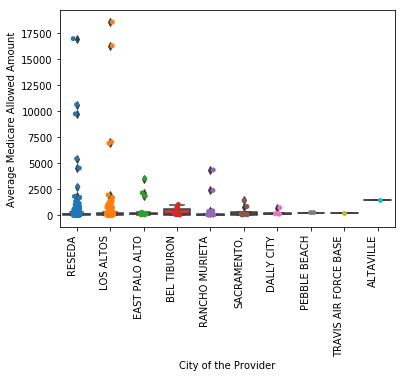

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# see the top 10 city in average medicare allowed amount
top_10_list_amaa = data_city_amaa.head(10)['City of the Provider']
top_10_amaa = data_ca_drop.loc[data_ca_drop['City of the Provider'].isin(top_10_list_amaa)]
ax = sns.boxplot(x = 'City of the Provider', y = 'Average Medicare Allowed Amount', data = top_10_amaa)
ax = sns.stripplot(x = 'City of the Provider', y = 'Average Medicare Allowed Amount', data = top_10_amaa, jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

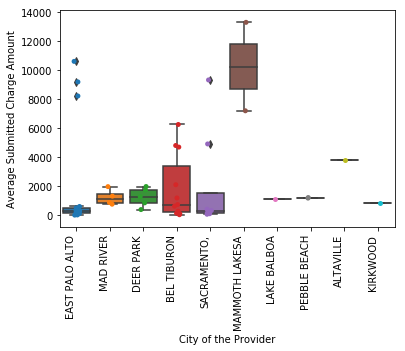

In [20]:
# see the top 10 city in average submitted chage amount 
top_10_list_asca = data_city_asca.head(10)['City of the Provider']
top_10_asca = data_ca_drop.loc[data_ca_drop['City of the Provider'].isin(top_10_list_asca)]
ax = sns.boxplot(x = 'City of the Provider', y = 'Average Submitted Charge Amount', data = top_10_asca)
ax = sns.stripplot(x = 'City of the Provider', y = 'Average Submitted Charge Amount', data = top_10_asca, jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

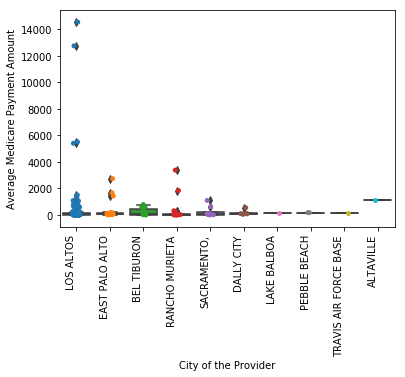

In [21]:
# see the top 10 city in average medicare payment amount 
top_10_list_ampa = data_city_ampa.head(10)['City of the Provider']
top_10_ampa = data_ca_drop.loc[data_ca_drop['City of the Provider'].isin(top_10_list_ampa)]
ax = sns.boxplot(x = 'City of the Provider', y = 'Average Medicare Payment Amount', data = top_10_ampa)
ax = sns.stripplot(x = 'City of the Provider', y = 'Average Medicare Payment Amount', data = top_10_ampa, jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

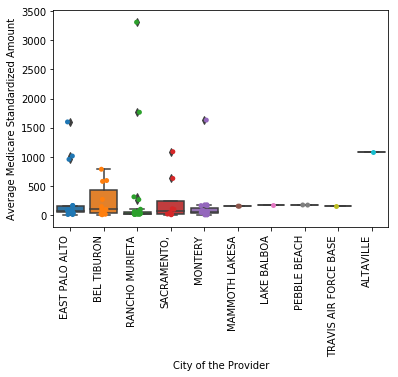

In [22]:
# see the top 10 city in average medicare standardized amount 
top_10_list_amsa = data_city_amsa.head(10)['City of the Provider']
top_10_amsa = data_ca_drop.loc[data_ca_drop['City of the Provider'].isin(top_10_list_amsa)]
ax = sns.boxplot(x = 'City of the Provider', y = 'Average Medicare Standardized Amount', data = top_10_amsa)
ax = sns.stripplot(x = 'City of the Provider', y = 'Average Medicare Standardized Amount', data = top_10_amsa, jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

Now I would like to see if there's any relationship between provider type and average medicare statistics 

In [23]:
data_provider = data_ca_drop.groupby('Provider Type')['Average Medicare Allowed Amount','Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'].mean()
data_provider

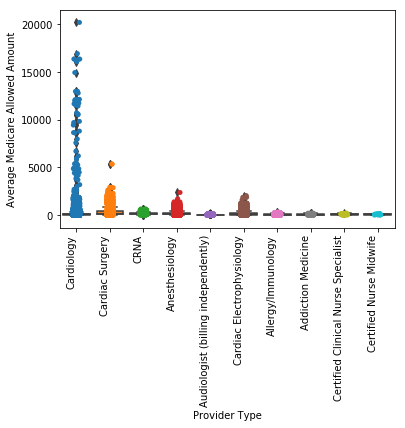

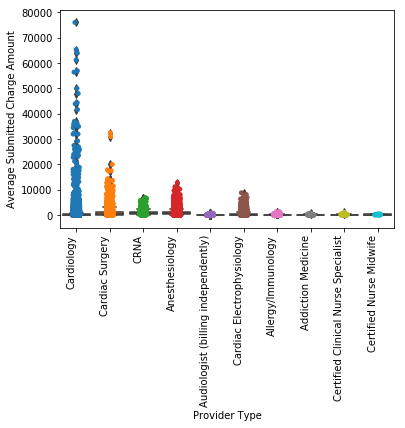

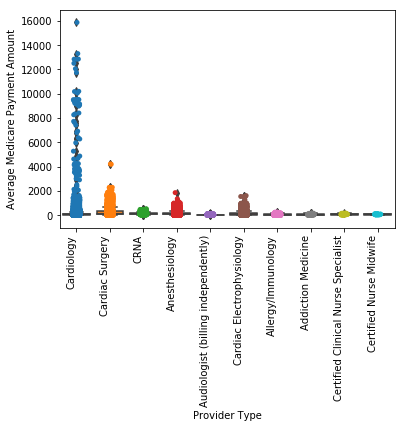

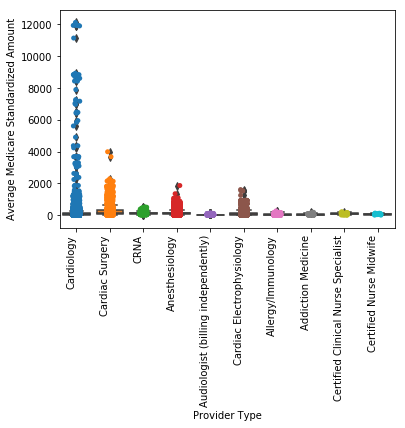

In [41]:
# see the top 10 providers in average medicare statistics
top_10_list_provider = data_provider.head(10).index
top_10_list_provider
top_10_provider = data_ca_drop.loc[data_ca_drop['Provider Type'].isin(top_10_list_provider)]

ax = sns.boxplot(x = 'Provider Type', y = 'Average Medicare Allowed Amount', data = top_10_provider)
ax = sns.stripplot(x = 'Provider Type', y = 'Average Medicare Allowed Amount', data = top_10_provider, jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

ax = sns.boxplot(x = 'Provider Type', y = 'Average Submitted Charge Amount', data = top_10_provider)
ax = sns.stripplot(x = 'Provider Type', y = 'Average Submitted Charge Amount', data = top_10_provider, jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

ax = sns.boxplot(x = 'Provider Type', y = 'Average Medicare Payment Amount', data = top_10_provider)
ax = sns.stripplot(x = 'Provider Type', y = 'Average Medicare Payment Amount', data = top_10_provider, jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

ax = sns.boxplot(x = 'Provider Type', y = 'Average Medicare Standardized Amount', data = top_10_provider)
ax = sns.stripplot(x = 'Provider Type', y = 'Average Medicare Standardized Amount', data = top_10_provider, jitter = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.show()

Now I wanna turn categorical columns into ordinals and add them to the dataset as new features

In [ ]:
data_ca_dummy = pd.get_dummies(data_ca_drop)